In [3]:
from neuralprophet import NeuralProphet
import pandas as pd
from pandas import to_datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, '/Users/koushikchennakesavan/Documents/EE364D/ml-covid-nba')
#may need to fix this with your FP to ml-covid-nba
from data.injury_labeller import injuryScore

In [4]:
scoreGen = injuryScore.injuryScore("embiijo01", 2019)
df = scoreGen.getInjuryScore()

In [5]:
df = df.dropna()
df = df[['Date', 'Injury and Fatigue Score']]
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = NeuralProphet(growth='logistic')
metric = model.fit(df, freq="D")
df_future = model.make_future_dataframe(df, periods=1200)
forecast = model.predict(df_future)
print(forecast)
forecast = forecast[['ds', 'yhat1']]
forecast.columns = ['ds', 'pred1']
print(forecast)

ERROR - (NP.config.__post_init__) - Invalid trend growth 'logistic'. Set to 'linear'
INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 51.562% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 725


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.08E-01, min: 5.03E+00


  0%|          | 0/105 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.08E-01, min: 1.12E+01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.63E-01
Epoch[725/725]: 100%|██████████| 725/725 [00:09<00:00, 78.14it/s, SmoothL1Loss=0.00709, MAE=0.0273, RMSE=0.0334, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 51.562% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major fre

             ds     y     yhat1 residual1     trend  season_weekly
0    2019-04-07  None  0.898251       NaN  0.866211       0.032040
1    2019-04-08  None  0.830335       NaN  0.867469      -0.037133
2    2019-04-09  None  0.879931       NaN  0.868726       0.011204
3    2019-04-10  None  0.868375       NaN  0.869984      -0.001608
4    2019-04-11  None  0.850838       NaN  0.871241      -0.020403
5    2019-04-12  None  0.906729       NaN  0.872498       0.034230
6    2019-04-13  None  0.855426       NaN  0.873756      -0.018329
7    2019-04-14  None  0.907053       NaN  0.875013       0.032040
8    2019-04-15  None  0.839137       NaN  0.876271      -0.037133
9    2019-04-16  None  0.888732       NaN  0.877528       0.011204
10   2019-04-17  None  0.877177       NaN  0.878785      -0.001608
11   2019-04-18  None  0.859640       NaN  0.880043      -0.020403
12   2019-04-19  None  0.915530       NaN  0.881300       0.034230
13   2019-04-20  None  0.864228       NaN  0.882558      -0.01

In [6]:
scoreGen = injuryScore.injuryScore("embiijo01", 2020)
df = scoreGen.getInjuryScore()
df = df.dropna()
df = df[['Date', 'Injury and Fatigue Score']]
df = df[df['Date'] < '2020-08-01']
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model2 = NeuralProphet(growth = 'logistic')
model2.fit(df, freq="D")
df_future2 = model2.make_future_dataframe(df, periods=750)
forecast2 = model2.predict(df_future)
forecast2 = forecast2[['ds', 'yhat1']]
forecast2.columns = ['ds', 'pred2']
print(forecast2)

ERROR - (NP.config.__post_init__) - Invalid trend growth 'logistic'. Set to 'linear'
INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 54.545% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 956


  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.11E+00, min: 1.23E-01


  0%|          | 0/103 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.40E+00, min: 1.50E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.66E-01
Epoch[956/956]: 100%|██████████| 956/956 [00:12<00:00, 78.40it/s, SmoothL1Loss=0.00956, MAE=0.0227, RMSE=0.0268, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency 2D corresponds to 54.545% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major fre

             ds     pred2
0    2019-04-07  3.615428
1    2019-04-08  3.642149
2    2019-04-09  3.623248
3    2019-04-10  3.600637
4    2019-04-11  3.601526
5    2019-04-12  3.556405
6    2019-04-13  3.581402
7    2019-04-14  3.520069
8    2019-04-15  3.546791
9    2019-04-16  3.527889
10   2019-04-17  3.505278
11   2019-04-18  3.506167
12   2019-04-19  3.461046
13   2019-04-20  3.486043
14   2019-04-21  3.424710
15   2019-04-22  3.451432
16   2019-04-23  3.432530
17   2019-04-24  3.409919
18   2019-04-25  3.410808
19   2019-04-26  3.365687
20   2019-04-27  3.390684
21   2019-04-28  3.329351
22   2019-04-29  3.356072
23   2019-04-30  3.337171
24   2019-05-01  3.314560
25   2019-05-02  3.315449
26   2019-05-03  3.270328
27   2019-05-04  3.295325
28   2019-05-05  3.233992
29   2019-05-06  3.260714
30   2019-05-07  3.241812
31   2019-05-08  3.219201
32   2019-05-09  3.220090
33   2019-05-10  3.174968
34   2019-05-11  3.199966
35   2019-05-12  3.138633
36   2019-05-13  3.165354
37   2019-05

In [ ]:
scoreGen = injuryScore.injuryScore("embiijo01", 2021)
df = scoreGen.getInjuryScore()
df = df.dropna()
df = df[['Date', 'Injury and Fatigue Score']]
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model3 = NeuralProphet()
model3.fit(df, freq="D")
df_future3 = model3.make_future_dataframe(df, periods=500)
forecast3 = model3.predict(df_future)
forecast3 = forecast3[['ds', 'yhat1']]
forecast3.columns = ['ds', 'pred3']

0.09907174022293529
-11.904964659581362
0.30289488228162115


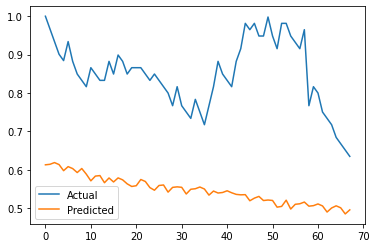

In [ ]:
scoreGen = injuryScore.injuryScore("embiijo01", 2022)
df = scoreGen.getInjuryScore()
df = df.dropna()
df = df[['Date', 'Injury and Fatigue Score']]
df.columns = ['ds', 'y']
forecast = forecast[forecast['ds'].isin(df['ds'])]
forecast2 = forecast2[forecast2['ds'].isin(df['ds'])]
forecast3 = forecast3[forecast3['ds'].isin(df['ds'])]
forecast = forecast.merge(forecast2, on = 'ds', how = 'left')
forecast = forecast.merge(forecast3, on = 'ds', how = 'left')
forecast['average_all'] = forecast[['pred1', 'pred2', 'pred3']].mean(axis = 1)
#print(forecast)
print(mean_squared_error(df['y'], forecast['average_all'], squared=True))
print(r2_score(df['y'], forecast['average_all']))
print(mean_absolute_error(df['y'], forecast['average_all']))
pyplot.plot(df['y'].values, label='Actual')
pyplot.plot(forecast['average_all'].values, label='Predicted')
pyplot.legend()
pyplot.show()